In [1]:
import pandas as pd
df=pd.read_csv(r'C:\\Users\Lenovo\Downloads\Crop_and_fertilizer dataset.csv')
print(df)

     Soil_color  Nitrogen  Phosphorus  Potassium   pH       Crop Fertilizer  \
0         Black        75          50        100  6.5  Sugarcane       Urea   
1         Black        80          50        100  6.5  Sugarcane       Urea   
2         Black        85          50        100  6.5  Sugarcane       Urea   
3         Black        90          50        100  6.5  Sugarcane       Urea   
4         Black        95          50        100  6.5  Sugarcane       Urea   
...         ...       ...         ...        ...  ...        ...        ...   
2916      Black       130          80        150  7.0  Sugarcane        MOP   
2917      Black       135          80        150  7.0  Sugarcane        MOP   
2918      Black       140          80        150  7.0  Sugarcane        MOP   
2919      Black       145          80        150  7.0  Sugarcane        MOP   
2920      Black       150          80        150  7.0  Sugarcane        MOP   

                              Link  
0     https://

In [2]:
df.shape

(2921, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Soil_color  2921 non-null   object 
 1   Nitrogen    2921 non-null   int64  
 2   Phosphorus  2921 non-null   int64  
 3   Potassium   2921 non-null   int64  
 4   pH          2921 non-null   float64
 5   Crop        2921 non-null   object 
 6   Fertilizer  2921 non-null   object 
 7   Link        2921 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 182.7+ KB


In [4]:
df.isnull().sum()

Soil_color    0
Nitrogen      0
Phosphorus    0
Potassium     0
pH            0
Crop          0
Fertilizer    0
Link          0
dtype: int64

In [5]:
df.duplicated().sum()

21

In [6]:
df.head()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Crop,Fertilizer,Link
0,Black,75,50,100,6.5,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Black,80,50,100,6.5,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Black,85,50,100,6.5,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Black,90,50,100,6.5,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Black,95,50,100,6.5,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [7]:
df.describe()

,Nitrogen,Phosphorus,Potassium,pH
count,2921.000000,2921.000000,2921.000000,2921.000000
mean,109.630264,59.698733,75.448477,6.754707
std,32.180999,15.169532,36.187594,0.639857
min,20.000000,15.000000,20.000000,5.500000
25%,90.000000,50.000000,50.000000,6.500000
50%,120.000000,60.000000,60.000000,6.500000
75%,135.000000,70.000000,100.000000,7.000000
max,150.000000,90.000000,150.000000,8.500000


In [8]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
corr = numeric_df.corr()  # Calculate the correlation matrix
print(corr)

            Nitrogen  Phosphorus  Potassium        pH
Nitrogen    1.000000    0.664996   0.441078  0.127899
Phosphorus  0.664996    1.000000   0.486449  0.214400
Potassium   0.441078    0.486449   1.000000  0.009116
pH          0.127899    0.214400   0.009116  1.000000


<Axes: >

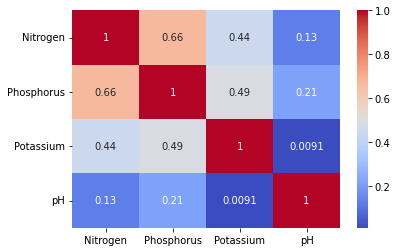

In [9]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [10]:
df['Fertilizer'].value_counts()

Fertilizer
Urea                  1223
DAP                    637
MOP                    472
SSP                    249
Magnesium Sulphate     215
Ammonium Sulphate       50
Ferrous Sulphate        50
Hydrated Lime           25
Name: count, dtype: int64

In [11]:
fertilizer_dict={
'Urea':1,
'DAP':2,                    
'MOP':3,                    
'SSP':4,                    
'Magnesium Sulphate':5,     
'Ammonium Sulphate':6,       
'Ferrous Sulphate':7,        
'Hydrated Lime':8 
}
df['Fertilizer_num']=df['Fertilizer'].map(fertilizer_dict)

In [12]:
df['Fertilizer_num'].value_counts()

Fertilizer_num
1    1223
2     637
3     472
4     249
5     215
6      50
7      50
8      25
Name: count, dtype: int64

In [13]:
df.drop('Fertilizer',axis=1,inplace=True)

In [14]:
df.head()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Crop,Link,Fertilizer_num
0,Black,75,50,100,6.5,Sugarcane,https://youtu.be/2t5Am0xLTOo,1
1,Black,80,50,100,6.5,Sugarcane,https://youtu.be/2t5Am0xLTOo,1
2,Black,85,50,100,6.5,Sugarcane,https://youtu.be/2t5Am0xLTOo,1
3,Black,90,50,100,6.5,Sugarcane,https://youtu.be/2t5Am0xLTOo,1
4,Black,95,50,100,6.5,Sugarcane,https://youtu.be/2t5Am0xLTOo,1


In [15]:
x=df.drop('Fertilizer_num',axis=1)
y=df['Fertilizer_num']

In [16]:
x.shape

(2921, 7)

In [17]:
y.shape

(2921,)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape

(2336, 7)

In [20]:
x_test.shape

(585, 7)

In [21]:
x_train

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Crop,Link
1091,Black,125,80,80,8.5,Sugarcane,https://youtu.be/VNptnPJt5yo
542,Dark Brown,110,50,50,7.0,Wheat,https://www.youtube.com/live/vX-DfTU-KbE?featu...
1340,Red,85,55,40,6.5,Rice,https://youtu.be/WaWgxSZHiWo
2436,Black,145,75,50,7.0,Maize,https://youtu.be/hxuB66J-3BI
1957,Black,70,50,55,7.5,Wheat,https://youtu.be/EhyW9blAneM
...,...,...,...,...,...,...,...
1638,Black,120,70,145,7.0,Sugarcane,https://youtu.be/VNptnPJt5yo
1095,Black,145,80,80,8.5,Sugarcane,https://youtu.be/VNptnPJt5yo
1130,Black,145,80,60,8.5,Sugarcane,https://youtu.be/xW8wji2zjcU
1294,Red,80,55,55,7.5,Rice,https://youtu.be/nZxrPsXAJE152


In [22]:
import numpy as np
x_train = x_train.select_dtypes(include=[np.number])
x_test = x_test.select_dtypes(include=[np.number])

In [23]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(x_train)
x_train=ms.transform(x_train)
x_test=ms.transform(x_test)

In [24]:
x_train

array([[0.80769231, 0.86666667, 0.46153846, 1.        ],
       [0.69230769, 0.46666667, 0.23076923, 0.5       ],
       [0.5       , 0.53333333, 0.15384615, 0.33333333],
       ...,
       [0.96153846, 0.86666667, 0.30769231, 1.        ],
       [0.46153846, 0.53333333, 0.26923077, 0.66666667],
       [0.96153846, 0.8       , 0.23076923, 0.66666667]])

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [26]:
x_train

array([[ 0.47505211,  1.3497231 ,  0.11597483,  2.73595066],
       [ 0.00917397, -0.64581687, -0.70873506,  0.3830801 ],
       [-0.7672896 , -0.31322688, -0.98363836, -0.40121009],
       ...,
       [ 1.09622296,  1.3497231 , -0.43383176,  2.73595066],
       [-0.92258231, -0.31322688, -0.57128341,  1.16737029],
       [ 1.09622296,  1.0171331 , -0.70873506,  1.16737029]])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

models={
    'LogisticRegression':LogisticRegression(),
    'naive bayes':GaussianNB(),
    'svm':SVC(),
    'k-nearest neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Bagging':BaggingClassifier(),
    'Gradient':GradientBoostingClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'ExtraTree':ExtraTreeClassifier(),
}

for name,md in models.items():
    md.fit(x_train,y_train)
    ypre=md.predict(x_test)

    print(f"{name} with accuracy : {accuracy_score(y_test,ypre)}")

LogisticRegression with accuracy : 0.4376068376068376
naive bayes with accuracy : 0.4153846153846154
svm with accuracy : 0.517948717948718
k-nearest neighbors with accuracy : 0.6666666666666666
Decision Tree with accuracy : 0.8393162393162393
Random Forest with accuracy : 0.8376068376068376
Bagging with accuracy : 0.8495726495726496
Gradient with accuracy : 0.6564102564102564


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost with accuracy : 0.38290598290598293
ExtraTree with accuracy : 0.7675213675213676


In [28]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
ypred=rf.predict(x_test)
accuracy_score(y_test,ypred)

0.8461538461538461

In [29]:
def recommendation(Nitrogen,Phosphorus,Potassium,pH):
    features=np.array([[Nitrogen,Phosphorus,Potassium,pH]])
    prediction=rf.predict(features).reshape(1,-1)

    return prediction[0]

In [30]:
Nitrogen=80
Phosphorus=50	
Potassium=100
pH=6.5



predict = recommendation(Nitrogen,Phosphorus,Potassium,pH)

fertilizer_dict={
1:"Urea",
2:"DAP",                    
3:"MOP",                    
4:"SSP",                    
5:"Magnesium Sulphate",     
6:"Ammonium Sulphate",       
7:"Ferrous Sulphate",        
8:"Hydrated Lime"
} 

if predict[0] in fertilizer_dict:
    fertilizer = fertilizer_dict[predict[0]]
    print("{} : is the best fertilizer for you crop ".format(fertilizer))
else:
    print("sorry we don't find fertilizer for your crop")    

MOP : is the best fertilizer for you crop 


In [31]:
df.columns

Index(['Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Crop',
       'Link', 'Fertilizer_num'],
      dtype='object')

In [32]:
df['Fertilizer_num'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)